<a href="https://colab.research.google.com/github/ankitchaahat/time_sereis/blob/main/FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
training_data=pd.read_csv("/content/train_E1GspfA.csv")
training_data.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [107]:
print(f"Starting date :{str(training_data['date'].min())}")
print(f"Ending date :{str(training_data['date'].max())}")

Starting date :2018-08-18
Ending date :2021-02-28


In [108]:
training_data.shape

(18247, 3)

In [109]:
training_data.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [110]:
def dataPreprocessing(dataFrame):
  dataFrame['date']=pd.to_datetime(dataFrame['date'])+ pd.to_timedelta(dataFrame['hour'], unit='h') # Use pd.to_timedelta to create Timedelta objects representing hours

  dataFrame.drop(columns=['hour'],axis=1,inplace=True)
  return dataFrame

In [111]:
training_data = dataPreprocessing(training_data)   # dataFrame = training_data
training_data.head()

,date,demand
0,2018-08-18 09:00:00,91
1,2018-08-18 10:00:00,21
2,2018-08-18 13:00:00,23
3,2018-08-18 14:00:00,104
4,2018-08-18 15:00:00,81


In [112]:
import plotly.express as xp
fig = xp.line(training_data, x='date', y='demand')
fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [113]:
training_data.head()

,date,demand
0,2018-08-18 09:00:00,91
1,2018-08-18 10:00:00,21
2,2018-08-18 13:00:00,23
3,2018-08-18 14:00:00,104
4,2018-08-18 15:00:00,81


In [114]:
training_data.shape

(18247, 2)

In [115]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
training_data.rename(columns={'date': 'ds', 'demand': 'y'}, inplace=True)
train_data = training_data.sample(frac=0.8, random_state=10)
validation_data = training_data.drop(train_data.index)

In [116]:
print(f'training data size : {train_data.shape}')
print(f'validation data size : {validation_data.shape}')

training data size : (14598, 2)
validation data size : (3649, 2)


In [117]:
train_data.head()

,ds,y
16492,2020-11-11 23:00:00,159
12072,2020-04-16 07:00:00,99
12429,2020-05-02 14:00:00,82
11536,2020-03-22 16:00:00,47
8356,2019-10-21 10:00:00,40


In [118]:
validation_data.head()

,ds,y
2,2018-08-18 13:00:00,23
11,2018-08-18 22:00:00,23
14,2018-08-19 08:00:00,48
18,2018-08-19 12:00:00,114
20,2018-08-19 14:00:00,65


In [119]:
# This method resets the index of the DataFrame, setting a new integer index (0, 1, 2, ...)
# and optionally dropping the old index or retaining it as a new column.

train_data = train_data.reset_index()
validation_data = validation_data.reset_index()

In [120]:
train_data.shape

(14598, 3)

In [121]:
validation_data.shape

(3649, 3)

In [122]:
!pip install cmdstanpy


In [123]:
!pip install prophet


In [124]:
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

In [125]:
model = Prophet()
model.fit(train_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmppjbr9tz_/28y84lgd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjbr9tz_/acyfrerg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39765', 'data', 'file=/tmp/tmppjbr9tz_/28y84lgd.json', 'init=/tmp/tmppjbr9tz_/acyfrerg.json', 'output', 'file=/tmp/tmppjbr9tz_/prophet_modelf9oj5y00/prophet_model-20240724075153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [126]:
validation_data.head()

,index,ds,y
0,2,2018-08-18 13:00:00,23
1,11,2018-08-18 22:00:00,23
2,14,2018-08-19 08:00:00,48
3,18,2018-08-19 12:00:00,114
4,20,2018-08-19 14:00:00,65


In [127]:
prediction= model.predict(validation_data)   # we have used validation data for prediction

Yes, in Prophet, you need to provide a DataFrame that includes both the dates and the values you want to forecast. This is different from many other prediction models where you often only provide features (X_test) to make predictions. Let me explain why Prophet requires a DataFrame and how you should prepare it.

Why Prophet Requires a DataFrame
Prophet is a forecasting tool developed by Facebook that models time series data with components such as trend, seasonality, and holidays. To use Prophet effectively, it needs:

Timestamps (ds): The dates or times for which predictions are needed. This is because Prophet performs time-based forecasting.
Values (y): The historical values or target variable you want to predict. During training, this includes the historical data, and for forecasting, this typically includes future dates where you want to predict the values.

In [128]:
(prediction.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-18 13:00:00,56.323020,30.305321,127.748548,56.323020,56.323020,25.082089,25.082089,25.082089,21.097577,...,13.522384,13.522384,13.522384,-9.537872,-9.537872,-9.537872,0.0,0.0,0.0,81.405109
1,2018-08-18 22:00:00,56.354188,8.206529,102.078820,56.354188,56.354188,-4.256382,-4.256382,-4.256382,-9.142099,...,14.124847,14.124847,14.124847,-9.239130,-9.239130,-9.239130,0.0,0.0,0.0,52.097806
2,2018-08-19 08:00:00,56.388820,4.971321,97.215805,56.388820,56.388820,-5.339612,-5.339612,-5.339612,-7.087816,...,10.660180,10.660180,10.660180,-8.911977,-8.911977,-8.911977,0.0,0.0,0.0,51.049208
3,2018-08-19 12:00:00,56.402673,26.648302,122.459274,56.402673,56.402673,16.856283,16.856283,16.856283,17.294854,...,8.344255,8.344255,8.344255,-8.782826,-8.782826,-8.782826,0.0,0.0,0.0,73.258956
4,2018-08-19 14:00:00,56.409599,32.809053,124.009354,56.409599,56.409599,21.806578,21.806578,21.806578,23.453260,...,7.071980,7.071980,7.071980,-8.718662,-8.718662,-8.718662,0.0,0.0,0.0,78.216177


In [129]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

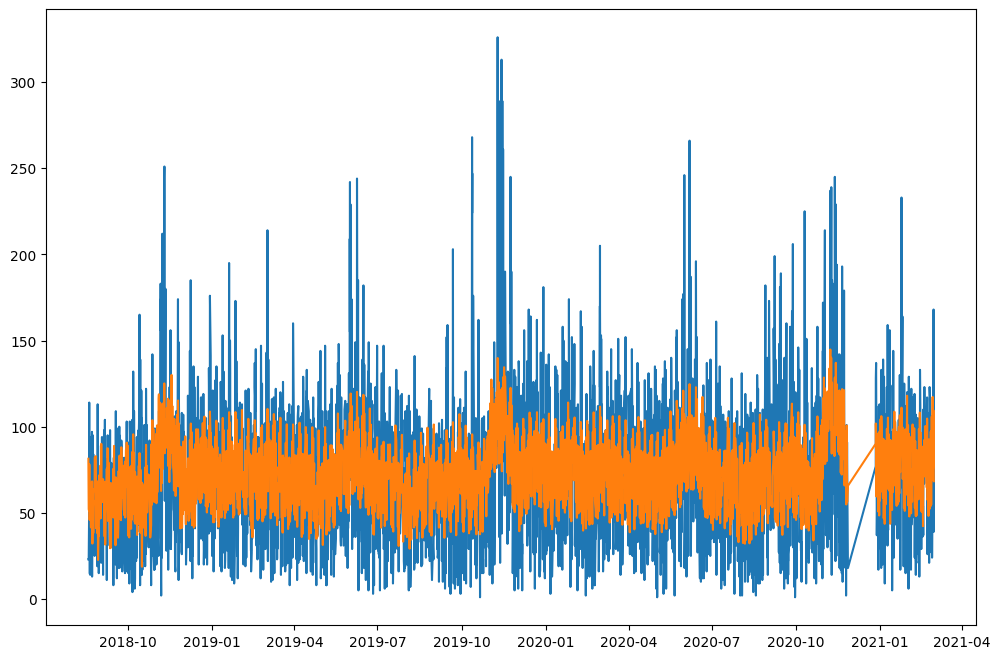

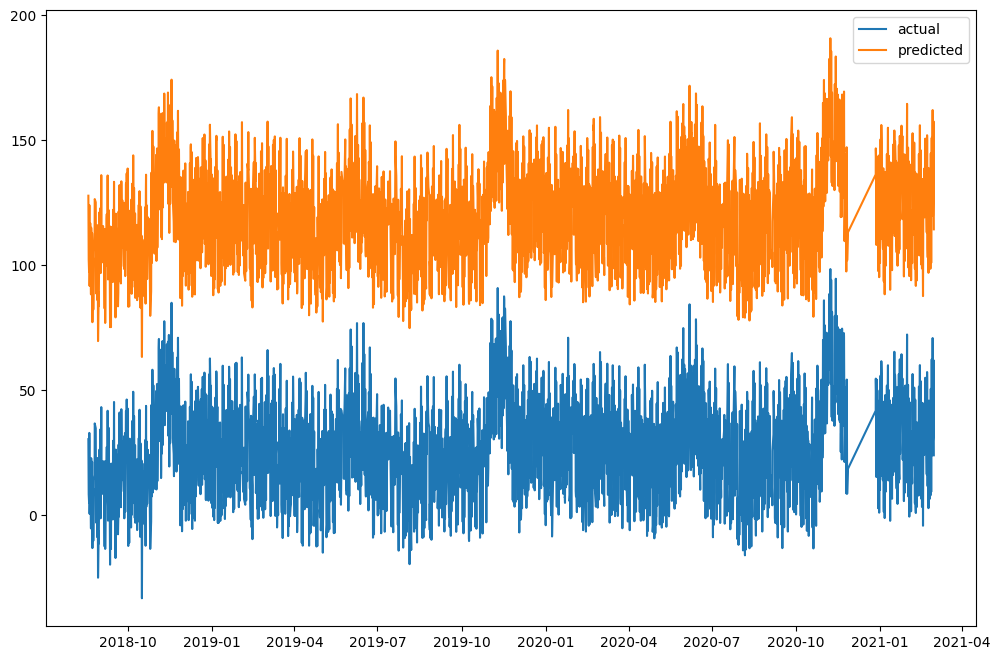

In [130]:
import matplotlib.pyplot as plt
# fig size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.plot(validation_data['ds'],validation_data['y'])
plt.plot(prediction['ds'],prediction['yhat'])
plt.show()
plt.plot(prediction['ds'],prediction['yhat_lower'])
plt.plot(prediction['ds'],prediction['yhat_upper'])
# legends
plt.legend(['actual','predicted','lower','upper'])

plt.show()

In [131]:
validation_data.head()

,index,ds,y
0,2,2018-08-18 13:00:00,23
1,11,2018-08-18 22:00:00,23
2,14,2018-08-19 08:00:00,48
3,18,2018-08-19 12:00:00,114
4,20,2018-08-19 14:00:00,65


In [132]:
y_actual = validation_data['y']
y_predicted = prediction['yhat']


In [133]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-18 13:00:00,56.323020,30.305321,127.748548,56.323020,56.323020,25.082089,25.082089,25.082089,21.097577,...,13.522384,13.522384,13.522384,-9.537872,-9.537872,-9.537872,0.0,0.0,0.0,81.405109
1,2018-08-18 22:00:00,56.354188,8.206529,102.078820,56.354188,56.354188,-4.256382,-4.256382,-4.256382,-9.142099,...,14.124847,14.124847,14.124847,-9.239130,-9.239130,-9.239130,0.0,0.0,0.0,52.097806
2,2018-08-19 08:00:00,56.388820,4.971321,97.215805,56.388820,56.388820,-5.339612,-5.339612,-5.339612,-7.087816,...,10.660180,10.660180,10.660180,-8.911977,-8.911977,-8.911977,0.0,0.0,0.0,51.049208
3,2018-08-19 12:00:00,56.402673,26.648302,122.459274,56.402673,56.402673,16.856283,16.856283,16.856283,17.294854,...,8.344255,8.344255,8.344255,-8.782826,-8.782826,-8.782826,0.0,0.0,0.0,73.258956
4,2018-08-19 14:00:00,56.409599,32.809053,124.009354,56.409599,56.409599,21.806578,21.806578,21.806578,23.453260,...,7.071980,7.071980,7.071980,-8.718662,-8.718662,-8.718662,0.0,0.0,0.0,78.216177


In [134]:
y_actual.head()

0     23
1     23
2     48
3    114
4     65
Name: y, dtype: int64

In [135]:
y_predicted.head()

0    81.405109
1    52.097806
2    51.049208
3    73.258956
4    78.216177
Name: yhat, dtype: float64

In [136]:
y_predicted = y_predicted.astype(int)
mean_absolute_error(y_actual, y_predicted)


29.684297067689776

In [137]:
!pip install plotly

In [138]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
 go.Scatter(x=validation_data['ds'], y=y_actual, name="actual targets"),
 secondary_y=False,)
fig.add_trace(
 go.Scatter(x=validation_data['ds'], y=y_predicted, name="predicted targets"),
 secondary_y=True,)
fig.update_layout(
 title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

In [139]:
test_data=pd.read_csv('/content/test_6QvDdzb.csv')

In [140]:
#   data preprocessing for the test dataset
print(f'test dataset size : {test_data.shape}')
testing_data = dataPreprocessing(test_data.copy())
testing_data.head()


test dataset size : (7650, 2)


,date
0,2021-03-01 00:00:00
1,2021-03-01 01:00:00
2,2021-03-01 02:00:00
3,2021-03-01 03:00:00
4,2021-03-01 05:00:00


In [141]:
testing_data.head()

,date
0,2021-03-01 00:00:00
1,2021-03-01 01:00:00
2,2021-03-01 02:00:00
3,2021-03-01 03:00:00
4,2021-03-01 05:00:00


In [142]:
# Note: Prophet models only understand the ds and y as input and output features.
 # So before training and prediction, make sure we have renamed our columns.

test_prediction = model.predict(pd.DataFrame({'ds':testing_data['date']}))

In [143]:
test_prediction = test_prediction['yhat']
test_prediction = test_prediction.astype(int)
test_data['demand'] = test_prediction
test_data.head()
final_data=test_data.to_csv('submission.csv', index=False)

In [144]:
print(test_prediction.head())

0    65
1    62
2    58
3    55
4    55
Name: yhat, dtype: int64
